### Gather Data, Cache, And Verify It Is As Expected

```get_apidata```

contains code to download and cache (locally as a csv) data generated from the 

[`colorbrains-api`](https://github.com/jbs-public-function/colorbrains-api) output


In [1]:
from IPython.display import Image

from colorbrains_research import get_apidata
from colorbrains_research.display_plots.mpl_plots import basecolors, cmy_comparisons, namedcolors_plots

### basecolors
Matplotlib defines and names 8 base colors. 

```blue, green, red, cyan, magenta, yellow, black, white```

Matplotlib colors are generally r,g,b with an alpha component but also accepts hex. Worth researching whether the ```cmyk``` color schemes are respected or these colors are included for calibration purposes.
A couple of interesting points
- red is defined as (1,0,0) or (255, 0, 0)
- blue is defined as (0,0,1) or (0, 0, 255)
- green is defined as (0, 0.5, 0) or (0, 128, 0)

ie max channel value for pure red & pure blue but only half channel value for their pure green.

- cyan (0, 0.75, 0.75), magenta (0.75, 0, 0.75), yellow (0.75, 0.75, 0); three of the four components of a CMYK based color system are defined as 3/4 of max channel on two of three channels.

White & Black are almost always defined as (1,1,1) & (0,0,0) respectively and this data is no exception.
In terms of a RGB based color system these values represent an absolute bounding of a continous set.

These colors seem assigned somewhat arbitrarily. Red & Blue assigned by definition. Green set to 1/2 input. Cyan, Magenta & Yellow are 3/4 max input value as a combination of 3 choose 2 from {r,g,b}


In [2]:
display(get_apidata.get_basecolors().shape)
display(get_apidata.get_basecolors())

(8, 4)

,color_name,red,green,blue
0,b,0.00,0.00,1.00
1,g,0.00,0.50,0.00
2,r,1.00,0.00,0.00
3,c,0.00,0.75,0.75
4,m,0.75,0.00,0.75
5,y,0.75,0.75,0.00
6,k,0.00,0.00,0.00
7,w,1.00,1.00,1.00


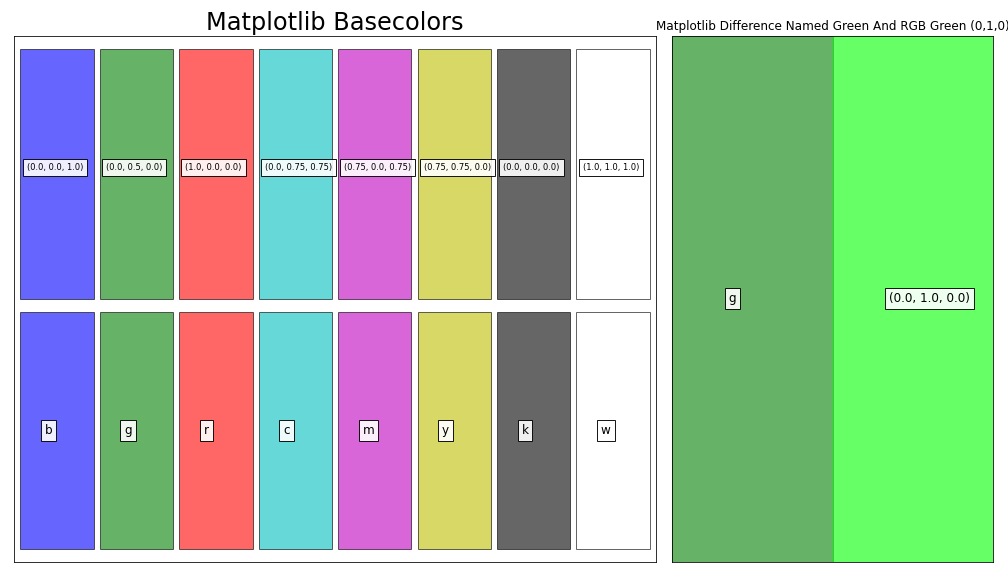

In [3]:
Image(basecolors(get_apidata.get_basecolors()))

Defining green in this fashion provides for a more visually similar experience to the remaining colors in this set. My initial opinion is that oure green seems dominating. Perhaps the c,m,y set could help explain this. 

Questions
- Why does the muted green feel less vibrant than the (what I perceive) to be the brigter green?
- - Is there a way to model what makes a baseline or not?
- - Why not max out c, m, y



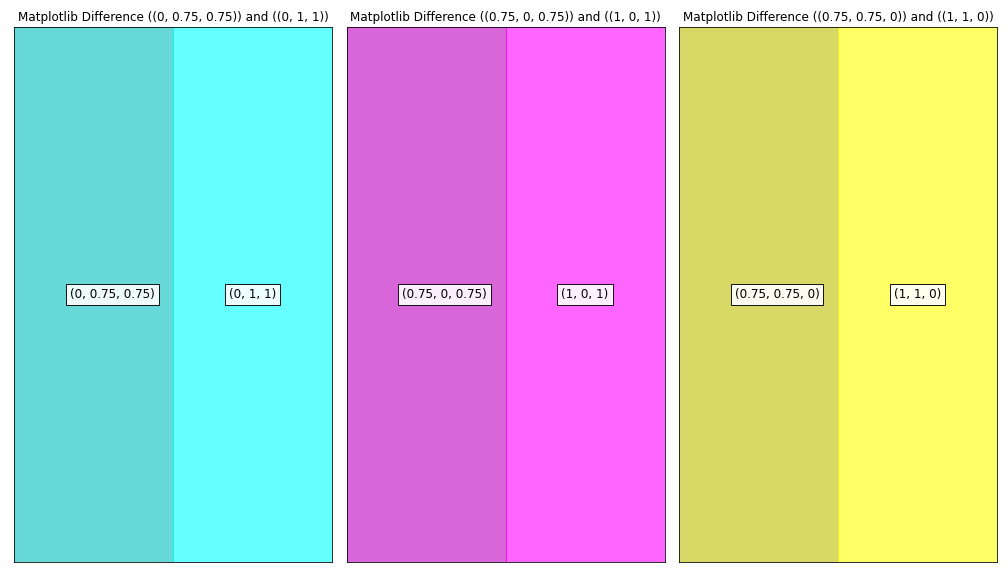

In [4]:
Image(cmy_comparisons())

I think Cyan is Aqua at full channel power. Likely Magenta is prenamed as is full channel yellow.
* Further down this notebook this is more or less confirmed. Interestingly, of the named matplotlib colors, `cyan` and `aqua` are both defined as full channel (0, 1, 1) which means that a version of `cyan` and `c` (I assume) are provided
* similarly, `fuscia` and `magenta` are defined as full channel (1, 0, 1), and `m` being an alternate definition
* (1, 1, 0) is singularly defined as yellow.

There are redundancies abound. I wonder if this is intentional or an artifact of relying on string inputs.

### Named Colors
Matplotlib provides another set of named colors. This set seems to be standard javascript color definitions and there are 9 redundant named colors out of a set of 148. The colors run the gamut of RGB. 

In [5]:
namedcolors = get_apidata.get_namedcolors()
display(namedcolors.shape)
namedcolors.head()

(148, 4)

,color_name,red,green,blue
0,aliceblue,0.941176,0.972549,1.000000
1,antiquewhite,0.980392,0.921569,0.843137
2,aqua,0.000000,1.000000,1.000000
3,aquamarine,0.498039,1.000000,0.831373
4,azure,0.941176,1.000000,1.000000


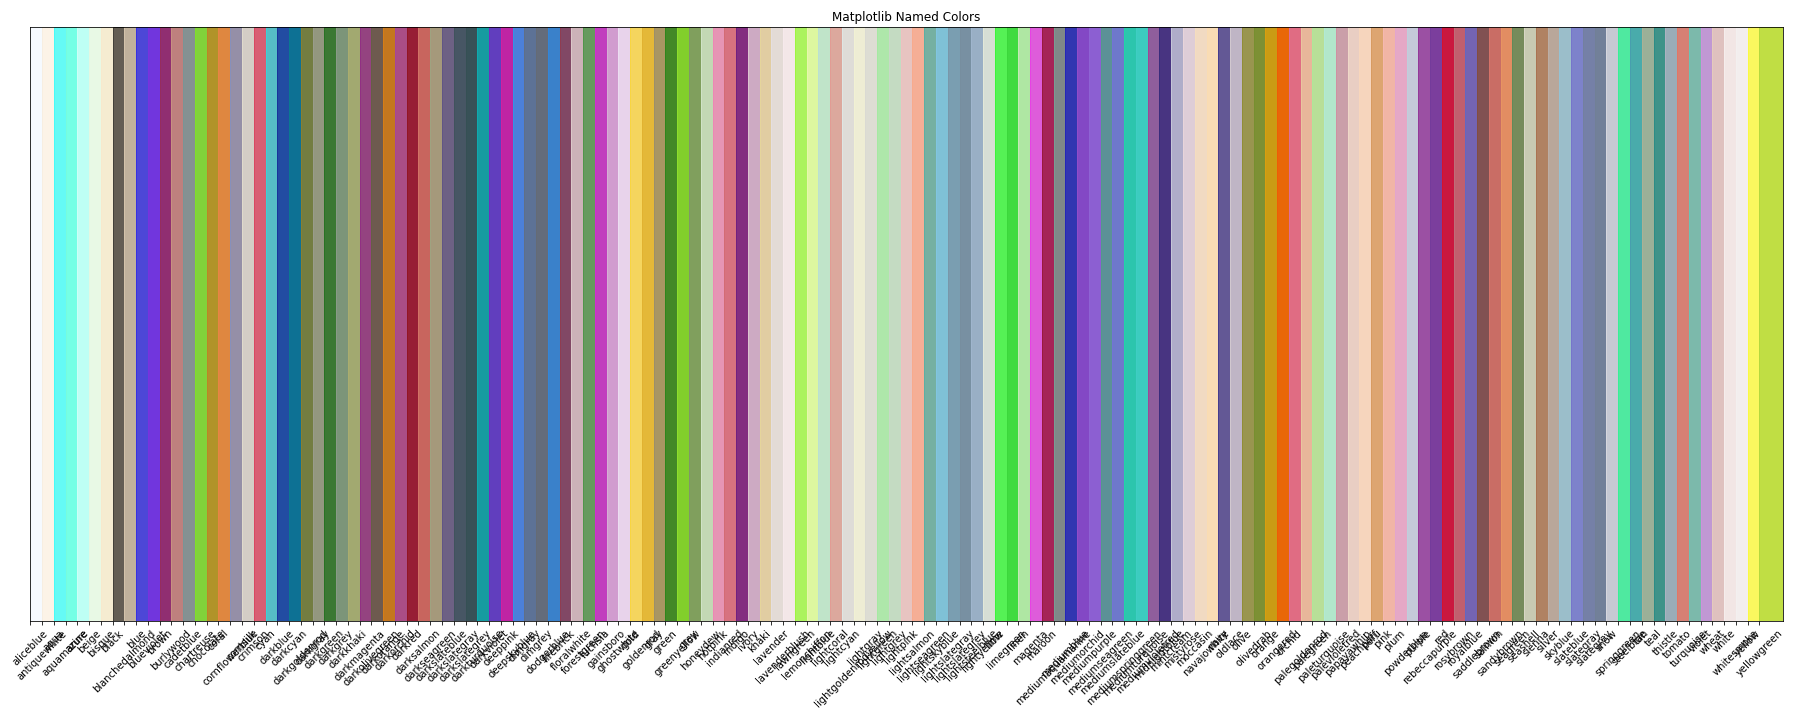

In [6]:
namedcolors = get_apidata.get_namedcolors()
data = {}
for i, v in namedcolors.iterrows():
    data[v.color_name] = (v.red, v.green, v.blue)
Image(namedcolors_plots(data))

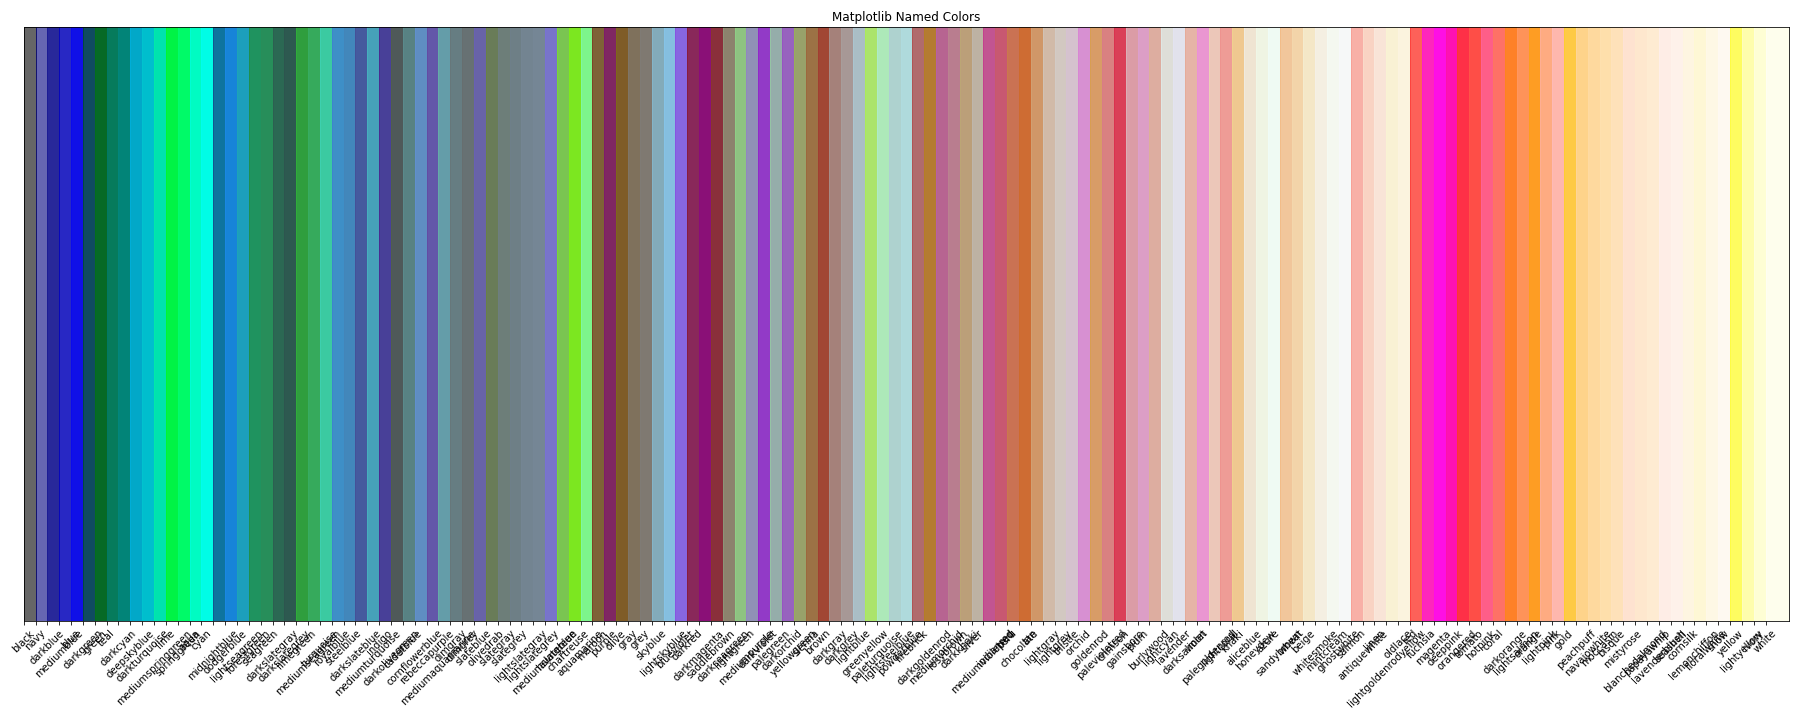

In [7]:
namedcolors = get_apidata.get_namedcolors()
namedcolors.sort_values(by=['red', 'green', 'blue'], inplace=True)
data = {}
for i, v in namedcolors.iterrows():
    data[v.color_name] = (v.red, v.green, v.blue)
Image(namedcolors_plots(data))

In [9]:
namedcolors.drop_duplicates(subset=['red', 'green', 'blue']).shape

(139, 4)

In [10]:
named_df = namedcolors
r,g,b = 1,1,1
named_df[(named_df['red'] == 0) & (named_df['green'] == g) & (named_df['blue'] == b)]

,color_name,red,green,blue
20,cyan,0.0,1.0,1.0
2,aqua,0.0,1.0,1.0


In [11]:
named_df[(named_df['red'] == r) & (named_df['green'] == 0) & (named_df['blue'] == b)]

,color_name,red,green,blue
85,magenta,1.0,0.0,1.0
48,fuchsia,1.0,0.0,1.0


In [12]:
named_df[(named_df['red'] == r) & (named_df['green'] == g) & (named_df['blue'] == 0)]

,color_name,red,green,blue
146,yellow,1.0,1.0,0.0
